# **Affinity Propagation Clustering Model Theory**


## Affinity Propagation Clustering

---

## Theory
Affinity Propagation (AP) is an unsupervised clustering algorithm that identifies exemplars (representative points) among data points and forms clusters based on message passing between points. Unlike K-Means, it does not require the number of clusters to be specified in advance. Instead, it automatically determines the number of clusters based on the data's inherent structure. It is widely used in image segmentation, gene expression analysis, and social network analysis.

The main idea is to:
- Use a similarity matrix to measure how well one data point can serve as an exemplar for another.
- Exchange messages (responsibility and availability) between data points to identify exemplars.
- Assign each data point to its most suitable exemplar, forming clusters.

---

## Mathematical Foundation
- **Similarity Matrix**:
  The similarity \( s(i, k) \) measures how well data point \( k \) can serve as an exemplar for data point \( i \):
  $$ s(i, k) = -\|x_i - x_k\|^2 $$
  - \( x_i, x_k \): Data points.
  - The diagonal \( s(k, k) \) is set to a preference value, which controls the likelihood of a point being an exemplar.

- **Responsibility**:
  The responsibility \( r(i, k) \) reflects how well-suited \( k \) is as an exemplar for \( i \), compared to other candidates:
  $$ r(i, k) = s(i, k) - \max_{k' \neq k} \{ a(i, k') + s(i, k') \} $$

- **Availability**:
  The availability \( a(i, k) \) reflects how appropriate it would be for \( i \) to choose \( k \) as its exemplar:
  $$ a(i, k) = \min \left( 0, r(k, k) + \sum_{i' \notin \{i, k\}} \max(0, r(i', k)) \right) $$

- **Exemplar Selection**:
  A point \( k \) is chosen as an exemplar if:
  $$ r(k, k) + a(k, k) > 0 $$

---

## Algorithm Steps
1. **Initialization**:
   - Compute the similarity matrix \( s(i, k) \).
   - Set the preference values \( s(k, k) \) (e.g., median of similarities).

2. **Message Passing**:
   - Iteratively update the responsibility and availability messages:
     - Update responsibilities:
       $$ r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} \{ a(i, k') + s(i, k') \} $$
     - Update availabilities:
       $$ a(i, k) \leftarrow \min \left( 0, r(k, k) + \sum_{i' \notin \{i, k\}} \max(0, r(i', k)) \right) $$

3. **Exemplar Identification**:
   - Identify exemplars based on the sum of responsibilities and availabilities.

4. **Cluster Assignment**:
   - Assign each data point to its most suitable exemplar.

---

## Key Parameters
- **damping**: Damping factor (between 0.5 and 1) to control message passing oscillations.
- **preference**: Preference for a point to be an exemplar (higher values lead to more clusters).
- **max_iter**: Maximum number of iterations.
- **convergence_iter**: Number of iterations with no change to stop early.

---

## Advantages
- Does not require the number of clusters to be specified.
- Automatically determines the number of clusters based on data.
- Works well with small to medium-sized datasets.
- Robust to initialization.

---

## Disadvantages
- Computationally expensive for large datasets (\( O(n^2) \)).
- Sensitive to the choice of preference values.
- Struggles with high-dimensional data.
- Requires careful tuning of damping and preference parameters.

---

## Implementation Tips
- Use the **median of similarities** as the preference value for balanced clustering.
- Use a **damping factor** (e.g., 0.5 to 0.9) to stabilize message passing.
- Scale features before clustering to ensure equal contribution from all features.
- Consider dimensionality reduction (e.g., PCA) for high-dimensional data.

---

## Applications
- Image segmentation
- Gene expression analysis
- Social network analysis
- Document clustering
- Anomaly detection

Affinity Propagation is a powerful and flexible clustering algorithm, especially for datasets where the number of clusters is unknown. While it has limitations, it is a valuable tool for many real-world applications.

## Model Evaluation for Affinity Propagation Clustering

---

### 1. Silhouette Score
**Formula:**
$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$
**Description:**
- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate well-separated clusters.
- Values close to 0 indicate overlapping clusters.
- Negative values suggest incorrect clustering.

---

### 2. Davies-Bouldin Index
**Formula:**
$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$
**Description:**
- Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
- Lower values indicate better clustering.

**Interpretation:**
- Values closer to 0 indicate better-defined clusters.
- Sensitive to the number of clusters and their separation.

---

### 3. Calinski-Harabasz Index
**Formula:**
$$
\text{CHI} = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$
**Description:**
- Measures the ratio of between-cluster dispersion to within-cluster dispersion.
- Higher values indicate better-defined clusters.

**Interpretation:**
- Higher values indicate better clustering.
- Useful for comparing different parameter settings.

---

### 4. Rand Index
**Formula:**
$$
\text{Rand Index} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
**Description:**
- Measures the similarity between two clusterings by counting pairs of points that are assigned to the same or different clusters in both clusterings.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect agreement.
- Requires ground truth labels for evaluation.

---

### 5. Adjusted Rand Index (ARI)
**Formula:**
$$
\text{ARI} = \frac{\text{Rand Index} - \text{Expected Rand Index}}{\max(\text{Rand Index}) - \text{Expected Rand Index}}
$$
**Description:**
- Adjusted version of the Rand Index that accounts for chance agreement.
- Ranges from -1 to 1.

**Interpretation:**
- Values close to 1 indicate strong agreement.
- Values close to 0 or negative indicate random or poor clustering.

---

### 6. Homogeneity, Completeness, and V-Measure
**Formulas:**
- **Homogeneity:**  
  $$
  h = 1 - \frac{H(C|K)}{H(C)}
  $$
- **Completeness:**  
  $$
  c = 1 - \frac{H(K|C)}{H(K)}
  $$
- **V-Measure:**  
  $$
  v = 2 \cdot \frac{h \cdot c}{h + c}
  $$

**Description:**
- **Homogeneity:** Measures if each cluster contains only members of a single class.
- **Completeness:** Measures if all members of a given class are assigned to the same cluster.
- **V-Measure:** Harmonic mean of homogeneity and completeness.

**Interpretation:**
- Ranges from 0 to 1, where 1 indicates perfect clustering.
- Requires ground truth labels for evaluation.

---

### 7. Preference Parameter Analysis
**Description:**
- Evaluates the impact of the preference parameter on clustering results.
- Preference determines how likely a point is to become an exemplar (cluster center).

**Interpretation:**
- Higher preference values result in more clusters.
- Lower preference values result in fewer clusters.
- Optimal preference balances cluster granularity and overfitting.

---

### 8. Cluster Stability
**Description:**
- Measures the consistency of clustering results across different subsamples of the data.
- Evaluated using techniques like bootstrapping or cross-validation.

**Interpretation:**
- Higher stability indicates more reliable clustering.
- Useful for assessing the robustness of Affinity Propagation.

---

### 9. Number of Clusters
**Description:**
- Affinity Propagation automatically determines the number of clusters based on the preference parameter and similarity matrix.
- Evaluates the appropriateness of the number of clusters identified.

**Interpretation:**
- Too many clusters may indicate overfitting.
- Too few clusters may indicate underfitting.
- Compare with domain knowledge or ground truth (if available).

---

### 10. Similarity Matrix Analysis
**Description:**
- Evaluates the quality of the similarity matrix used in Affinity Propagation.
- Determines how well the matrix captures the underlying data structure.

**Interpretation:**
- A well-constructed similarity matrix should reflect the true relationships between data points.
- Poor similarity matrices may lead to incorrect clustering.

---

## sklearn template [AffinityPropagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

### class AffinityPropagation(*, damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False, random_state=None)

| **Parameter**               | **Description**                                                                                                                                     | **Default**      |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|------------------|
| `damping`                  | Damping factor (between 0.5 and 1) to avoid numerical oscillations                                                                                 | `0.5`            |
| `max_iter`                 | Maximum number of iterations                                                                                                                       | `200`            |
| `convergence_iter`         | Number of iterations with no change in the number of clusters to stop early                                                                        | `15`             |
| `copy`                     | If True, the input data is copied; if False, the input data is overwritten                                                                         | `True`           |
| `preference`               | Preferences for points to be chosen as exemplars (if None, preferences are set to the median of the input similarities)                            | `None`           |
| `affinity`                 | Metric used to compute the affinity matrix: 'euclidean' or 'precomputed'                                                                           | `'euclidean'`    |
| `verbose`                  | Enable verbose output                                                                                                                              | `False`          |
| `random_state`             | Controls random seed for reproducibility                                                                                                           | `None`           |

-

| **Attribute**              | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `cluster_centers_indices_` | Indices of cluster centers                                                                                                                         |
| `labels_`                  | Labels of each point                                                                                                                                |
| `affinity_matrix_`         | Affinity matrix used for clustering (if `affinity='precomputed'`, this is the input matrix)                                                        |
| `n_iter_`                  | Number of iterations performed                                                                                                                      |
| `n_features_in_`           | Number of features seen during fit                                                                                                                  |

-

| **Method**                 | **Description**                                                                                                                                     |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| `fit(X)`                   | Fit the affinity propagation clustering on the data                                                                                                |
| `fit_predict(X)`           | Fit the model and predict cluster labels                                                                                                           |
| `predict(X)`               | Predict the closest cluster for each sample in X                                                                                                   |
| `get_params()`             | Get parameters for this estimator                                                                                                                   |
| `set_params()`             | Set the parameters of this estimator                                                                                                                |

# Affinity Propagation Clustering - Example

## Data loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable (for comparison, not used in clustering)

# Display the first few rows of the dataset
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
dtype: int64


##  Data processing

In [3]:
# Standardize the features (Affinity Propagation is sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier plotting
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


## Plotting data

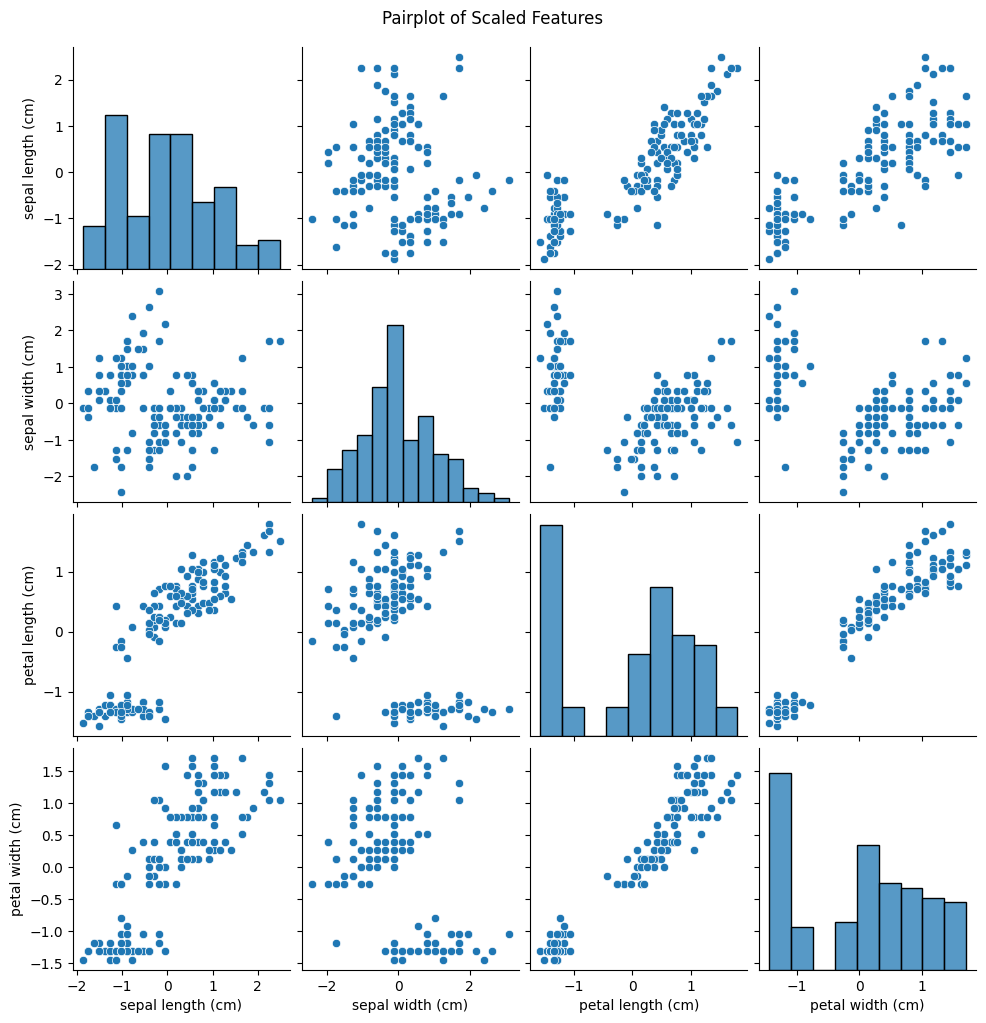

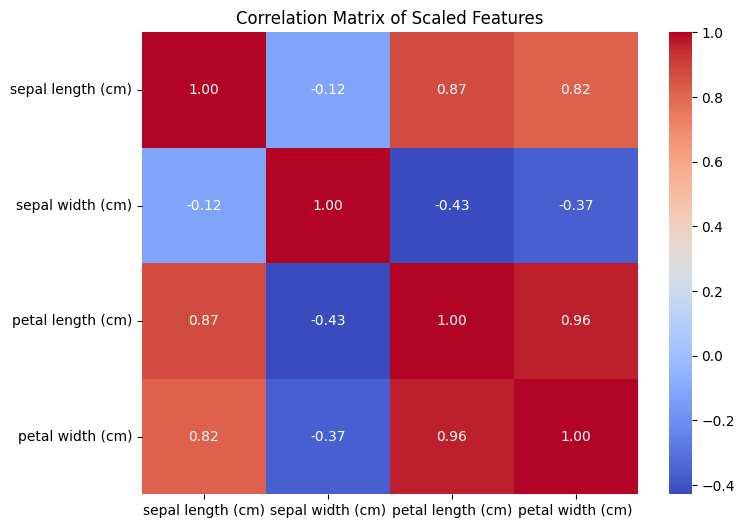

In [4]:
# Plot the distribution of features
sns.pairplot(X_scaled)
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scaled Features")
plt.show()

## Model definition

In [5]:
# Define the Affinity Propagation model
affinity_propagation = AffinityPropagation(damping=0.9, random_state=42)  # Adjust damping as needed

# Fit the model to the scaled data
affinity_propagation.fit(X_scaled)

# Get the cluster labels
cluster_labels = affinity_propagation.labels_

# Add cluster labels to the original dataset for visualization
X['Cluster'] = cluster_labels
print("Cluster Labels:")
print(X.head())

# Number of clusters
n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Cluster Labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        2  
1        0  
2        0  
3        0  
4        2  
Number of clusters: 7


## Model evaulation

Silhouette Score: 0.3416


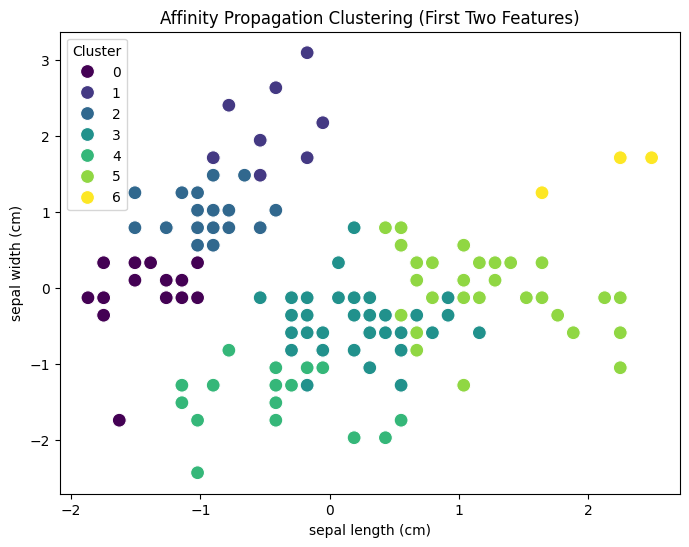

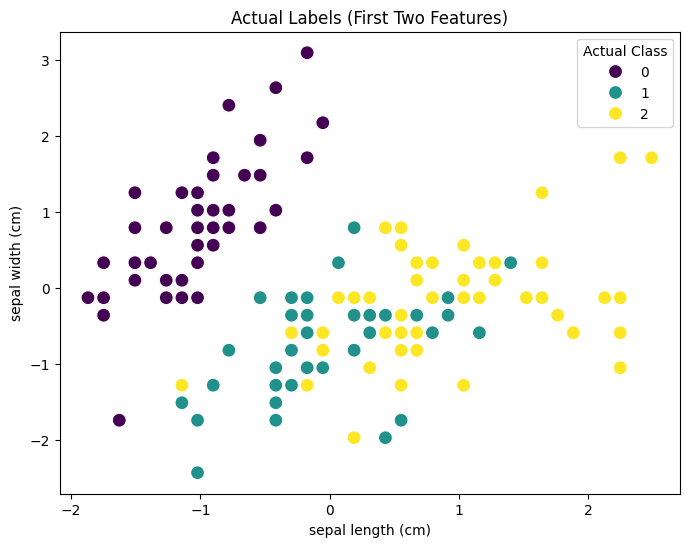

In [6]:
# Evaluate the clustering using Silhouette Score (if more than one cluster)
if n_clusters > 1:  # Silhouette Score requires at least 2 clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be computed with only one cluster.")

# Plot the clusters (using the first two features for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title("Affinity Propagation Clustering (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Compare clusters with actual labels (for visualization purposes only)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=y, palette='viridis', s=100)
plt.title("Actual Labels (First Two Features)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title='Actual Class')
plt.show()